# Example: using Broyden updates
By T. Fitzgerald

We'll be solving the same system of equations that we worked on during the previous class
$$ \frac{x^2}{4} + y^2 = 1 $$
$$ y = 0.7x^4 + 0.1x^3 - 2.5x^2 + 1 $$

In [1]:
using Pkg
Pkg.activate(".")
using LinearAlgebra
using Plots

In [2]:
p(x) = 0.7x^4 + 0.1x^3 - 2.5x^2 + 1
f1(z) = z[1]^2/4 + z[2]^2 - 1
f2(z) = p(z[1]) - z[2]
f(z) = [f1(z), f2(z)]
;

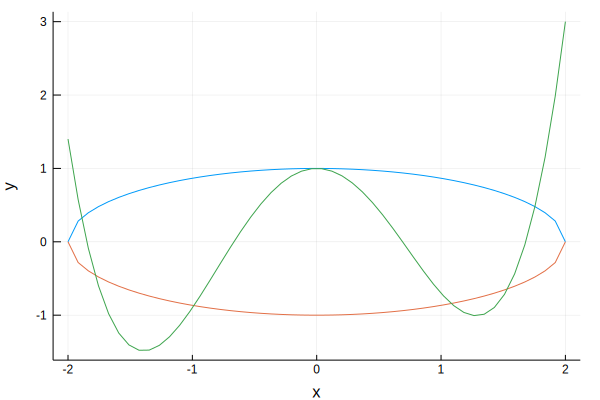

In [3]:
x = LinRange(-2,2,50)
y1 = sqrt.( 1 .- x.^2/4 )
plt = plot(x,y1, label="")
plot!(plt, x,-y1, label="")
plot!(plt, x, p.(x) , label="")
plot!(xlabel = "x", ylabel = "y")

In [4]:
iter = 0
max_iter = 50
tol = 1e-8
flag = 0

# Initial guess
x0 = [1.,-1.]

# Compute Jacobian by finite differences
# ε = 1e-5
# J = zeros(2,2)
# J[:,1] = ( f(x0 + ε*[1,0]) - f(x0) )/ε
# J[:,2] = ( f(x0 + ε*[0,1]) - f(x0) )/ε

# Have starting guess of the Jacobian = eye(2)
J = diagm( 0 => [1,1.] )

# initial step
D = inv(J)
d = -D*f(x0)
x1 = x0 + d
F = f(x1)

while flag == 0

    u = D*F
    c = d'*( d + u )
    D = D - 1/c*(u*d')*D
    
    iter += 1
    
    d = -D*F
    x1 = x1 + d
    F = f(x1)
    err = norm(F)
   
    if err <= tol
        flag = 1
        
    elseif iter >= max_iter
        flag = -1
    end  
    
end

In [5]:
x1,iter

([1.08216, -0.84097], 7)

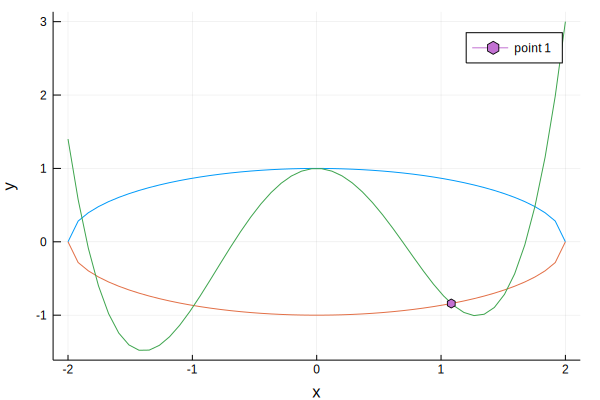

In [6]:
plot!(plt, [x1[1]], [x1[2]], markershape = :hexagon, label="point 1")

Package this routine into a function

In [7]:
function myBroyden(x0, J0; tol = 1e-8, max_iter = 50)
    iter = 0
    flag = 0

    # initial step
    D = inv(J0)
    d = -D*f(x0)
    x1 = x0 + d
    F = f(x1)
    
    while flag == 0

        u = D*F
        c = d'*( d + u )
        D -= 1/c*(u*d')*D   

        iter += 1

        d = -D*F
        x1 = x1 + d
        F = f(x1)
        
        err = norm(F)

        if err <= tol
            flag = 1

        elseif iter >= max_iter
            flag = -1
            
        end  

    end
    
    return x1, flag, iter
    
end

myBroyden (generic function with 1 method)

In [8]:
# Initial guess
x0 = [1.5,-1.]

# Compute Jacobian by finite differences
ε = 1e-5
J = zeros(2,2)
J[:,1] = ( f(x0 + ε*[1,0]) - f(x0) )/ε
J[:,2] = ( f(x0 + ε*[0,1]) - f(x0) )/ε
x1 = myBroyden(x0, J)

([1.53561, -0.640681], 1, 6)

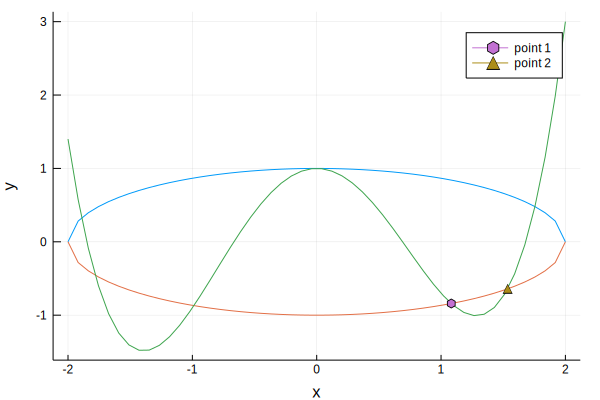

In [9]:
plot!(plt, [x1[1][1]], [x1[1][2]], markershape = :utriangle, label="point 2")

Let's find the rest of the roots

In [10]:
InitialGuess = hcat( [1.5,0.5] , [0.1,1.1], [-2,0.5], [-2, -1], [-1,-1] )

2×5 Array{Float64,2}:
 1.5  0.1  -2.0  -2.0  -1.0
 0.5  1.1   0.5  -1.0  -1.0

In [11]:
results = zeros(size(InitialGuess))
for i = 1:size(InitialGuess,2)
    x0 = InitialGuess[:,i]

    # Compute Jacobian by finite differences
    ε = 1e-5
    J = zeros(2,2)
    J[:,1] = ( f(x0 + ε*[1,0]) - f(x0) )/ε
    J[:,2] = ( f(x0 + ε*[0,1]) - f(x0) )/ε
    
    results[:,i] = myBroyden(x0, J)[1]
    
end

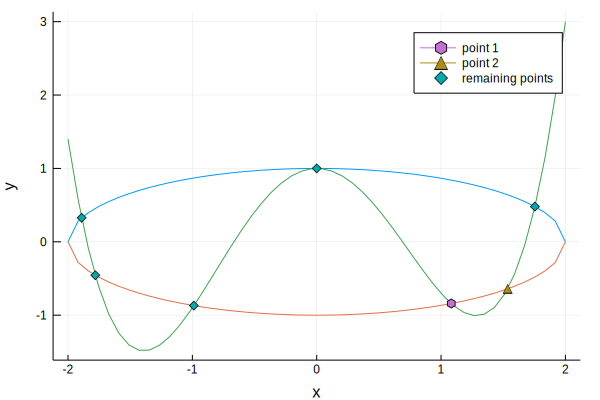

In [12]:
plot!(plt, results[1,:], results[2,:] , markershape = :diamond, seriestype = :scatter, label = "remaining points" )